In [63]:
import pandas as pd

# Load the dataset
customer_data = pd.read_csv('customer_dataset.csv')

/var/folders/p1/z8dhpprj11b1w1rsyp3fh4zr0000gn/T/ipykernel_18363/3294755354.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_data = pd.read_csv('customer_dataset.csv')


In [64]:
customer_data.head(5)

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790,1.11,2.84
1,2,176875,15.74,33.83
2,3,6812,2.11,NaN
3,4,38542,7.82,10.73
4,5,48712,7.51,10.04


In [65]:
customer_data.count()

customer_id                        570000
average_monthly_spend              560614
average_monthly_visit_frequency    560672
average_monthly_basket_size        560714
dtype: int64

In [66]:
# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)



Missing Values:
 customer_id                           0
average_monthly_spend              9386
average_monthly_visit_frequency    9328
average_monthly_basket_size        9286
dtype: int64


In [67]:
# Drop rows with missing values
customer_data.dropna(inplace=True)

In [68]:
# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
dtype: int64


In [69]:
customer_data.count()

customer_id                        542000
average_monthly_spend              542000
average_monthly_visit_frequency    542000
average_monthly_basket_size        542000
dtype: int64

In [70]:
# Check for duplicates
duplicate_rows = customer_data.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)


Duplicate Rows: 3053


In [71]:
# Remove duplicates
customer_data.drop_duplicates(inplace=True)

In [72]:
customer_data.count()

customer_id                        538947
average_monthly_spend              538947
average_monthly_visit_frequency    538947
average_monthly_basket_size        538947
dtype: int64

In [ ]:
# Check for outliers and handle them if necessary
# (e.g., using z-score or IQR method)

In [48]:
# Check if a specific column contains multiple data types
def check_mixed_types(series):
    types = series.map(type).unique()  # Maps the type function to all elements and gets unique types
    return len(types) > 1  # Returns True if more than one type is found

# Apply this check to each column in the DataFrame
mixed_type_columns = {col: check_mixed_types(customer_data[col]) for col in customer_data.columns}
print(mixed_type_columns)


{'customer_id': False, 'average_monthly_spend': True, 'average_monthly_visit_frequency': True, 'average_monthly_basket_size': False}


In [50]:
# Function to count types in a column
def type_counts(series):
    return series.apply(lambda x: type(x).__name__).value_counts()

# Apply this function to each column you want to analyze
type_breakdown = type_counts(customer_data['average_monthly_visit_frequency'])
print(type_breakdown)


average_monthly_visit_frequency
float    373583
str      165364
Name: count, dtype: int64


In [51]:
import pandas as pd

# Assuming customer_data is already loaded
# Convert 'average_monthly_visit_frequency' to numeric, coercing errors to NaN
customer_data['average_monthly_visit_frequency'] = pd.to_numeric(customer_data['average_monthly_visit_frequency'], errors='coerce')

# Drop rows with NaN values in 'average_monthly_visit_frequency'
customer_data.dropna(subset=['average_monthly_visit_frequency'], inplace=True)

# Now all entries in 'average_monthly_visit_frequency' should be numeric (floats)
print(customer_data['average_monthly_visit_frequency'].dtype)


float64


In [52]:
print(customer_data['average_monthly_visit_frequency'].apply(type).value_counts())


average_monthly_visit_frequency
<class 'float'>    538942
Name: count, dtype: int64


In [53]:
# Assuming customer_data is already loaded
# Convert 'average_monthly_visit_frequency' to numeric, coercing errors to NaN
customer_data['average_monthly_spend'] = pd.to_numeric(customer_data['average_monthly_spend'], errors='coerce')

# Drop rows with NaN values in 'average_monthly_visit_frequency'
customer_data.dropna(subset=['average_monthly_spend'], inplace=True)

# Now all entries in 'average_monthly_visit_frequency' should be numeric (floats)
print(customer_data['average_monthly_spend'].dtype)

float64


In [62]:
customer_data

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
0,1,-0.519889,-1.083745,-0.868306,1
1,2,1.408789,1.664561,1.705986,0
3,4,-0.106387,0.176756,-0.212896,2
4,5,0.005006,0.118521,-0.270213,2
5,6,1.359040,1.367751,1.808160,0
...,...,...,...,...,...
569990,22624,-0.013855,-0.223373,-0.290150,2
569991,234632,0.447928,0.749711,2.078133,0
569996,215276,1.018486,1.613840,1.481701,0
569997,11515,-0.427960,-0.899648,-0.721275,1


In [61]:
customer_data.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,538941.000000,5.389410e+05,5.389410e+05,5.389410e+05,538941.000000
mean,279521.535773,-9.347494e-18,-2.758236e-16,8.394287e-17,1.357689
std,161819.589563,1.000001e+00,1.000001e+00,1.000001e+00,1.042408
min,1.000000,-6.636376e-01,-5.049346e+00,-2.682522e+00,0.000000
25%,139174.000000,-4.135672e-01,-8.432920e-01,-7.885605e-01,1.000000
50%,278832.000000,-1.785244e-01,-2.402802e-01,-2.909803e-01,1.000000
75%,420230.000000,4.069850e-01,5.580999e-01,3.478162e-01,2.000000
max,560000.000000,5.288352e+02,7.999973e+01,3.088046e+01,4.000000


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

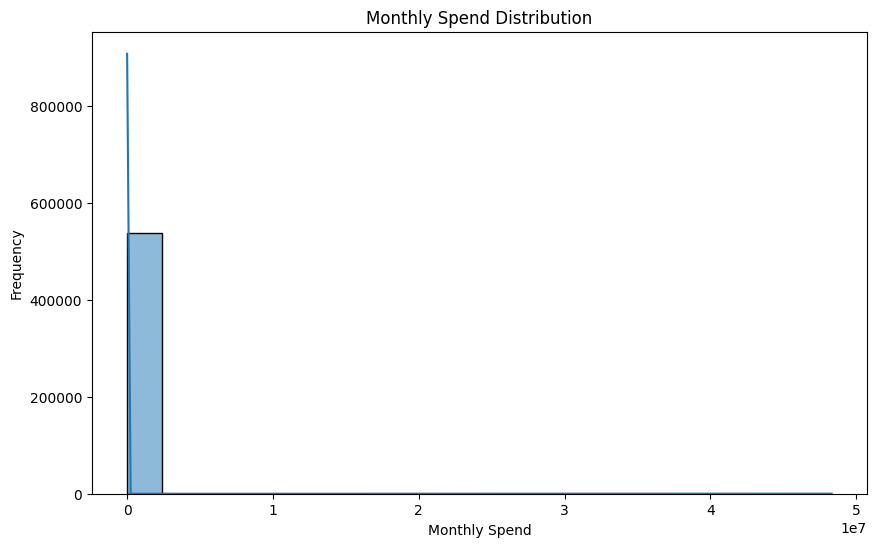

In [56]:
    # Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['average_monthly_spend'], bins=20, kde=True)
plt.title('Monthly Spend Distribution')
plt.xlabel('Monthly Spend')
plt.ylabel('Frequency')
plt.show()

In [57]:
customer_data.head(5)

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.84
1,2,176875.0,15.74,33.83
3,4,38542.0,7.82,10.73
4,5,48712.0,7.51,10.04
5,6,172333.0,14.16,35.06


In [58]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']])
customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']] = scaled_features

# Derived metrics (if needed)
# e.g., customer_data['spend_per_visit'] = customer_data['monthly_spend'] / customer_data['monthly_visit_frequency']


In [59]:
# Model Selection (e.g., K-means clustering)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']])

# Evaluate clustering performance
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']], customer_data['cluster'])
print("Silhouette Score:", silhouette_score)


KeyboardInterrupt: 